This is a dataset of top 50 Spotify music from 2010 to 2019. Originally published at [Kaggle:Top Spotify songs from 2010-2019 - BY YEAR](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year) which is scraped from [Spotify: Organize your music](http://organizeyourmusic.playlistmachinery.com/)

After cleaning the data, it contains 14 columns and 603 rows of data.

The type of attributes: 'title' is categorical. 'artist' is categorical. 'genre of the track' is categorical. 'year' is quantitative. 'Beats per minute' is quantitative. 'energy' is quantitative. 'Danceability' is quantitative. 'Loudness/dB' is quantitative. 'Liveness' is quantitative. 'Valence' is quantitative. 'Length' is quantitative. 'Acousticness' is quantitative. 'Speechiness' is quantitative. 'Popularity' is quantitative.

Questions and tasks related to the dataset:
1. Is there any important characteristics (eg:Beats per minute) that make them top 50 songs in the year?
2. What is the most popular  gemusicnre in these years and is there any trend for the popularity?

In [1]:
import pandas as pd
import statistics as stat
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spotify_data = pd.read_csv("Dataset/top10s.csv",encoding= 'latin-1')
spotify_data.head(10)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


In [3]:
spotify_data.tail(10)


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
593,594,Call You Mine,The Chainsmokers,electropop,2019,104,70,59,-6,34,52,218,20,3,81
594,595,No Guidance (feat. Drake),Chris Brown,dance pop,2019,93,45,70,-7,16,14,261,12,15,81
595,596,Antisocial (with Travis Scott),Ed Sheeran,pop,2019,152,82,72,-5,36,91,162,13,5,78
596,597,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)",DJ Snake,electronic trap,2019,96,80,84,-4,6,62,213,16,23,77
597,598,Con Calma - Remix,Daddy Yankee,latin,2019,94,87,74,-3,4,61,181,17,5,76
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69
602,603,Kills You Slowly,The Chainsmokers,electropop,2019,150,44,70,-9,13,23,213,6,6,67


In [4]:
spotify_data.shape

(603, 15)

In [5]:
spotify_data.isna().any()

Unnamed: 0    False
title         False
artist        False
top genre     False
year          False
bpm           False
nrgy          False
dnce          False
dB            False
live          False
val           False
dur           False
acous         False
spch          False
pop           False
dtype: bool

In [6]:
spotify_data = spotify_data.drop(columns=['Unnamed: 0'])

In [42]:
def check_unique_by_column(column):
    print(column, 'has ', len(spotify_data[column].unique().tolist()), " unique values")
    print('')
for col in spotify_data.columns:
    check_unique_by_column(col)


title has  584  unique values

artist has  184  unique values

top genre has  50  unique values

year has  10  unique values

bpm has  104  unique values

nrgy has  77  unique values

dnce has  70  unique values

dB has  14  unique values

live has  61  unique values

val has  94  unique values

dur has  144  unique values

acous has  75  unique values

spch has  39  unique values

pop has  71  unique values



In [8]:
spotify_data.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


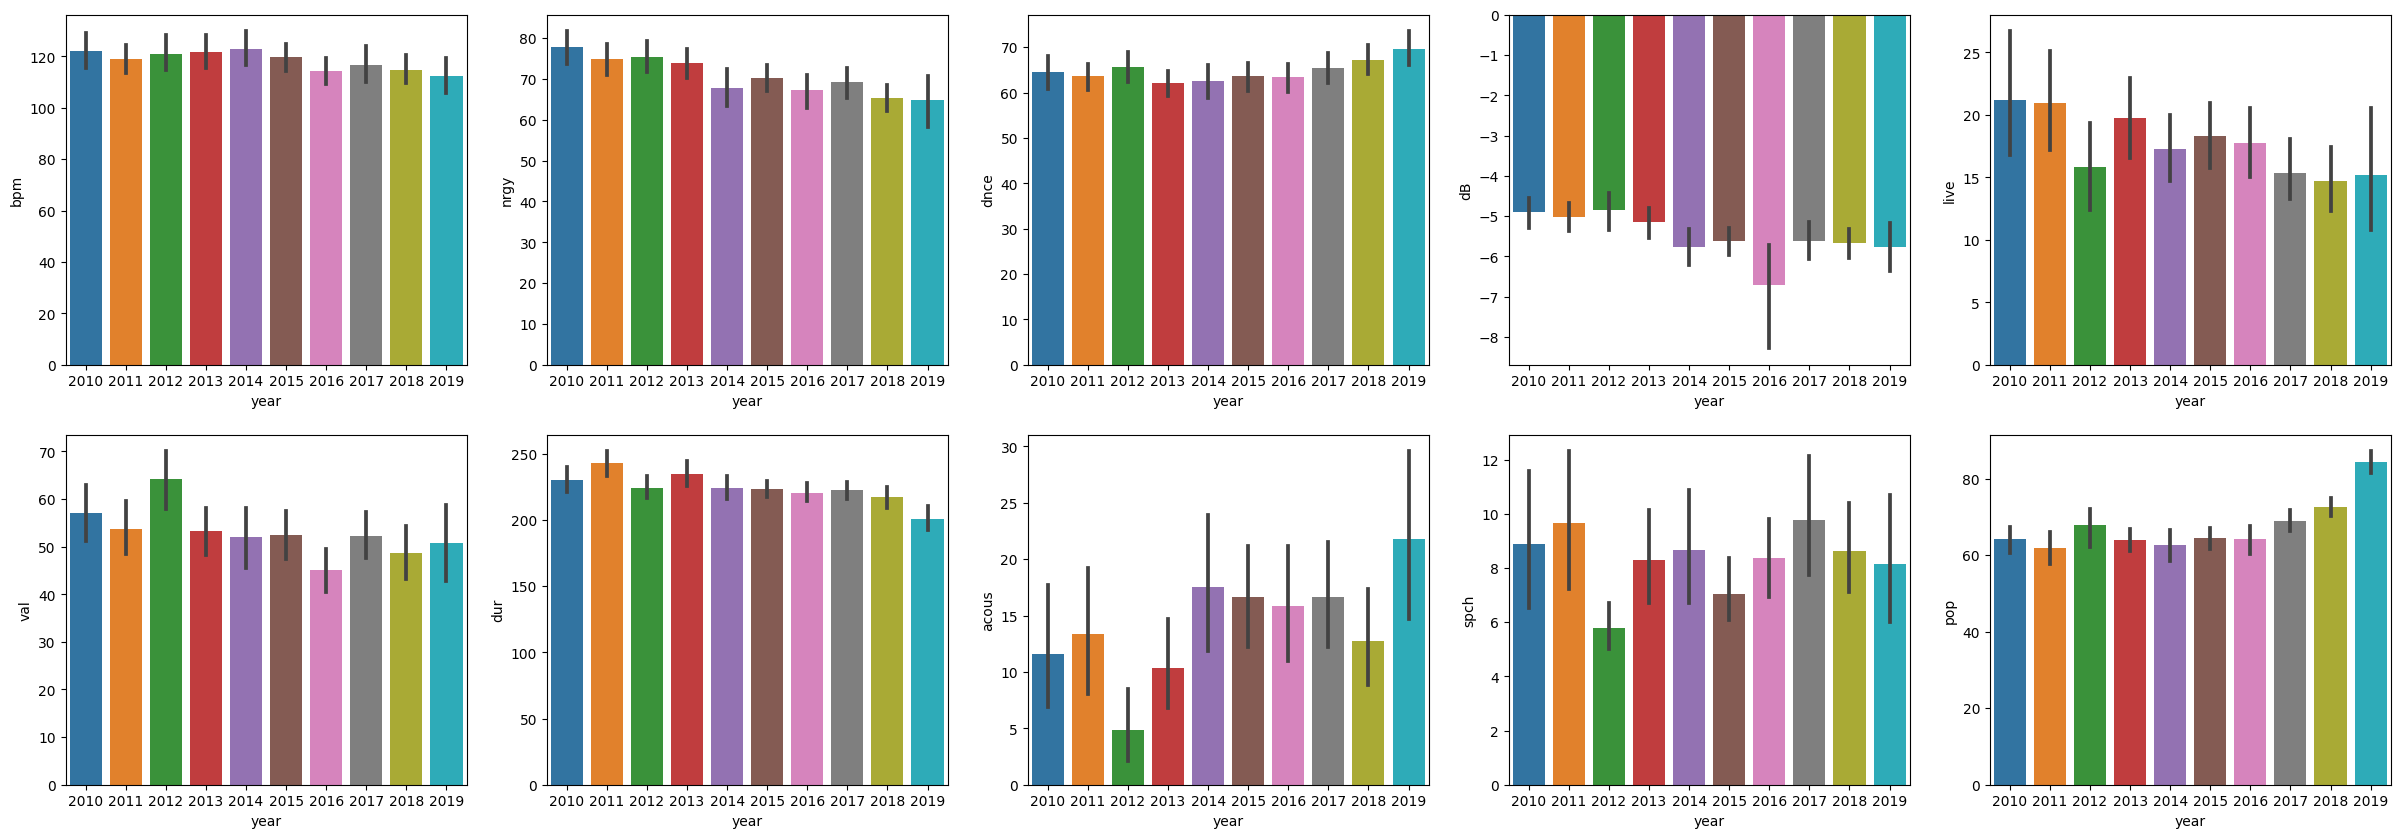

In [47]:

columns = ['bpm','nrgy','dnce','dB','live','val','dur','acous',	'spch'	,'pop']
def barPlotByYear(columns, size = (0,0) ,figsize = (30,10)):
    z= 0
    fig, ax = plt.subplots(size[0],size[1],figsize = figsize)
    for i in range(0,size[0]):
        for j in range(0,size[1]):
            sns.barplot(spotify_data, x = 'year', y = columns[z], ax = ax[i][j])
            z = z + 1
    plt.show()
barPlotByYear(columns, size= (2,5))

In [46]:
# top50 song of the year analysis
a = []
for year in spotify_data['year'].unique().tolist(): 
    a.append(spotify_data.where(spotify_data['year'] == year).head(50))
a[0].head(10) 

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010.0,97.0,89.0,67.0,-4.0,8.0,80.0,217.0,19.0,4.0,83.0
1,Love The Way You Lie,Eminem,detroit hip hop,2010.0,87.0,93.0,75.0,-5.0,52.0,64.0,263.0,24.0,23.0,82.0
2,TiK ToK,Kesha,dance pop,2010.0,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,14.0,80.0
3,Bad Romance,Lady Gaga,dance pop,2010.0,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,4.0,79.0
4,Just the Way You Are,Bruno Mars,pop,2010.0,109.0,84.0,64.0,-5.0,9.0,43.0,221.0,2.0,4.0,78.0
5,Baby,Justin Bieber,canadian pop,2010.0,65.0,86.0,73.0,-5.0,11.0,54.0,214.0,4.0,14.0,77.0
6,Dynamite,Taio Cruz,dance pop,2010.0,120.0,78.0,75.0,-4.0,4.0,82.0,203.0,0.0,9.0,77.0
7,Secrets,OneRepublic,dance pop,2010.0,148.0,76.0,52.0,-6.0,12.0,38.0,225.0,7.0,4.0,77.0
8,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010.0,93.0,37.0,48.0,-8.0,12.0,14.0,216.0,74.0,3.0,76.0
9,Only Girl (In The World),Rihanna,barbadian pop,2010.0,126.0,72.0,79.0,-4.0,7.0,61.0,235.0,13.0,4.0,73.0


In [54]:
spotify_data['top genre']

0           neo mellow
1      detroit hip hop
2            dance pop
3            dance pop
4                  pop
            ...       
598          dance pop
599                pop
600          dance pop
601          dance pop
602         electropop
Name: top genre, Length: 603, dtype: object